In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def display_img(img):
    new_img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(new_img)
    plt.show()

def displayImages(img1,img2):
    fig= plt.figure(figsize=(10,20))
    fig.add_subplot(1,2, 1)
    img1= cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    plt.imshow(img1)
    plt.axis('off')
    plt.title("Original")
    fig.add_subplot(1, 2, 2)
    img2= cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    plt.imshow(img2)
    plt.axis('off')
    plt.title("Blurred")
    plt.show()
def displayImages2(img1,img2):
    fig= plt.figure(figsize=(10,20))
    fig.add_subplot(1,2, 1)
    img1= cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    plt.imshow(img1)
    plt.axis('off')
    plt.title("Mask")
    fig.add_subplot(1, 2, 2)
    img2= cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    plt.imshow(img2)
    plt.axis('off')
   
    plt.show()

# **Task 1**


In [7]:
import time
from timeit import default_timer as timer
time=0
cap = cv2.VideoCapture('images/video.mp4')
while True:
    
    ret, frame = cap.read()
    hsv_frame=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    lowerLimit = np.array([110, 110, 110])
    upperLimit = np.array([130, 255, 255])
    mask = np.zeros(frame.shape, dtype=np.uint8)
    mask = cv2.inRange(hsv_frame, lowerLimit, upperLimit)
    resulted_frame = cv2.bitwise_and(frame, frame, mask=mask)
    start = timer()
    cv2.imshow('frame', resulted_frame)
    if cv2.waitKey(33) == ord('t'):
        break
    end = timer()
    time+=end-start
    if time>60:
        break
cap.release()
cv2.destroyAllWindows()

# **Task 2**


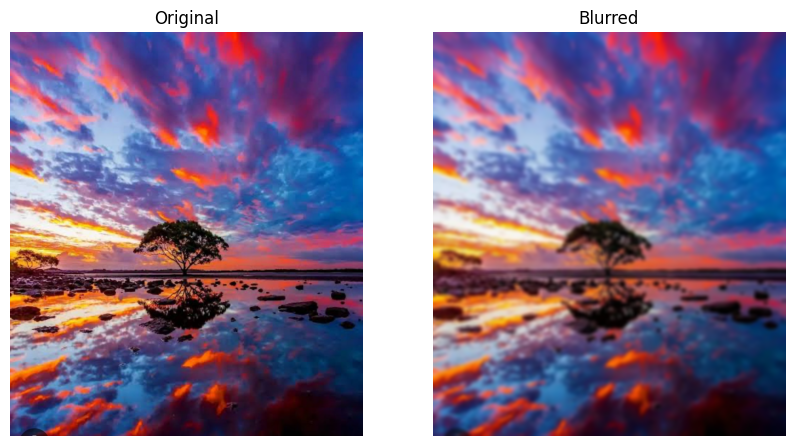

In [4]:

sigma = 6
size = 20
x, y = np.meshgrid(np.arange(size) - size//2, np.arange(size) - size//2)
kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
kernel /= np.sum(kernel)
image=cv2.imread('images/sky.jpeg')

blurred_image = cv2.filter2D(image, -1, kernel)
displayImages(image,blurred_image)

# **Task 3**

Point 1: (133, 202)
Pixel = [  0   0 254]


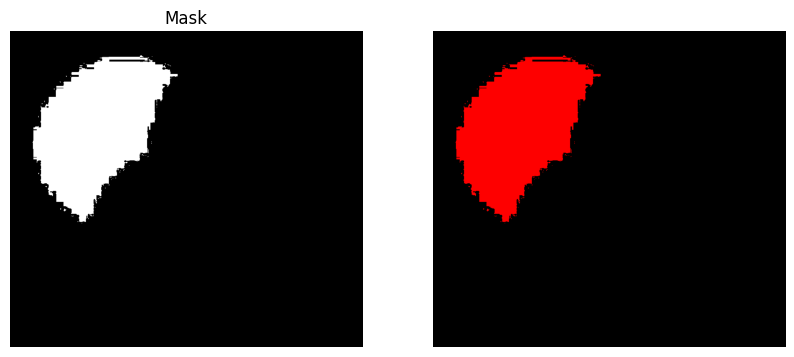

In [5]:
point1 = None
image= cv2.imread('images/c.jpeg')
x1=y1=0

def cropFunction(event,x,y,flags,param):
    global point1,x1,y1
    if event == cv2.EVENT_LBUTTONDOWN:
        if point1 is None:
            point1 = (x,y)
            x1=x
            y1=y
            print(f"Point 1: {point1}")
            
        
        
cv2.namedWindow('image')
cv2.setMouseCallback('image',cropFunction)

while(1):
    cv2.imshow('image',image)
    key = cv2.waitKey(1)
    if key == 27:
        break
cv2.destroyAllWindows()
mask = np.zeros(image.shape[:2], dtype=np.uint8)
# display_img(mask)
# print (image.shape)
pixel_value = image[y1, x1]
b=pixel_value[0]
g=pixel_value[1]
r=pixel_value[2]
print(f"Pixel = {pixel_value}")
# print (pixel_value)
for row in range(image.shape[0]):
    for col in range(image.shape[1]):
        if b==image[row,col][0] and g==image[row,col][1] and r==image[row,col][2] :
                 mask[row, col] = 255
      
    
# print (image[266,159][1])

new_image = cv2.bitwise_and(image, image, mask=mask)

displayImages2(mask,new_image)